In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from scipy.stats import spearmanr
from scipy.stats import stats
from scipy.stats import shapiro
import statsmodels.api
from statsmodels.formula.api import ols

5 corrélation :

- 1° lien entre le genre d'un client et les categ des livres achetés,
- 2° lien etre âge des clients et le montant total des achats
- 3° lien etre âge des clients et la fréquence d'achat
- 4° lien entre l'âge des clients et la taille du panier moyen
- 5° lien entre âge des clients et les categ des livres achetés

In [2]:
#J'importe ma base de donnée des customers

df_B2C = pd.read_csv('BDD/df_B2C.csv', index_col=0)

In [3]:
df_B2C

,session_id,client_id,price,categ,sex,birth,year,month,day,time_buy,age_buy,range_age,Mois/Année
id_prod,,,,,,,,,,,,,
0_1259,s_1,c_329,11.99,0,f,1967,2021,3,1,00:01:07,54,[50 - 55],2021-03-01
1_498,s_4624,c_329,23.37,1,f,1967,2021,3,11,00:57:22,54,[50 - 55],2021-03-01
0_1140,s_7071,c_329,3.73,0,f,1967,2021,3,16,10:01:30,54,[50 - 55],2021-03-01
1_451,s_8134,c_329,20.99,1,f,1967,2021,3,18,17:26:18,54,[50 - 55],2021-03-01
0_1390,s_2,c_664,19.37,0,m,1960,2021,3,1,00:02:26,61,[61 - 66],2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2_209,s_344993,c_3631,69.99,2,f,2004,2023,2,21,21:26:07,19,[17 - 22],2023-02-01
1_366,s_345020,c_4819,28.54,1,f,2004,2023,2,21,21:27:32,19,[17 - 22],2023-02-01
1_369,s_347637,c_3058,23.99,1,m,1959,2023,2,27,08:59:50,64,[61 - 66],2023-02-01


<font size="6"><b>Test de Corrélation</b></font>

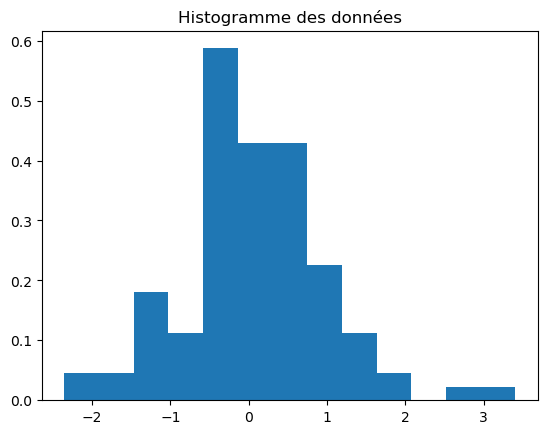

Statistique de test : 0.9732577800750732
P-valeur : 0.03945130854845047
Les données ne semblent pas normalement distribuées (rejet de l'hypothèse nulle)


In [4]:
df_B2C = np.random.normal(size=100)


plt.hist(df_B2C, bins='auto', density=True)
plt.title('Histogramme des données')
plt.show()

stat, p_value = shapiro(df_B2C)

print(f"Statistique de test : {stat}")
print(f"P-valeur : {p_value}")

alpha = 0.05
if p_value > alpha:
    print("Les données semblent normalement distribuées (non-rejet de l'hypothèse nulle)")
else:
    print("Les données ne semblent pas normalement distribuées (rejet de l'hypothèse nulle)")

<font size="4"><b>1°) Lien entre le genre d'un client et les catégories des livres achetés</b></font>

J'ai opté pour le test de corrélation khi-2 qui me parait plus adapté pour l'analyse de l'association entre deux variables qualitatives, comme ici le genre d'un client et la catégorie des livres achetés. Je vais l'utiliser pour évaluer la dépendance entre deux variables catégorielles.

In [4]:
#Je crée un tableau de contagence (tableau croisé), c'est une représentation des proportions d'occurrence 
#de deux ou plusieurs variables catégorielles

genre_x_categorie = pd.crosstab(df_B2C['sex'], df_B2C['categ'])
genre_x_categorie

categ,0,1,2
sex,,,
f,200793,115592,16980
m,186488,104777,15868


In [5]:
# j'applique le test du khi-deux

chi2, p, dof, expected = chi2_contingency(genre_x_categorie)

print(f"Statistique du test du khi-deux : {chi2}")
print(f"Valeur p : {p}")
print(f"Degrés de liberté : {dof}")

inf = (genre_x_categorie - expected)**2 / expected

Statistique du test du khi-deux : 22.483190290238603
Valeur p : 1.3117082821156392e-05
Degrés de liberté : 2


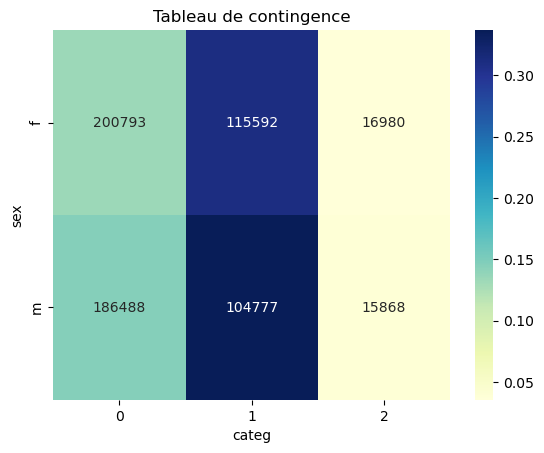

In [6]:
sns.heatmap(inf / chi2 , annot=genre_x_categorie, fmt="d", cmap="YlGnBu")
plt.title('Tableau de contingence')

plt.show()

Ici la p value est très importante, elle sert à indiquer l'acceptation ou le rejet de l'hypothèse nulle. 

Grâce à notre tableau de contingence, aucun des résultats est en dessous de 0.05, donc l'hypothèse nulle est rejeté. J'en conclus que l'achat de produit de catégories différentes ne dépend pas du genre de l'acheteur.

<font size="4"><b>2°) Lien entre l'âge des clients et le montant total des achats</b></font>

J'ai opté pour le test de corrélation de Spearman, il est plus approprié que un pearson car la relation entre les variables n'est pas strictement linéaire et est moins sensible aux valeurs abberantes.

Si j'avais la possibilité de vérifier la théorie qui va suivre, j'aurai utilisé pearson, je n'ai pas assez d'informations pour pouvoir l'appliquer, avec l'échantillon que j'ai actuellement, j'aurai probablement un résultat assez similaire avec les deux tests.

In [7]:
client_age = df_B2C.groupby(["age_buy"])["client_id"].count()
montant_total_client = df_B2C.groupby(["age_buy"])["price"].sum()

In [8]:
correlation_coefficient, p_value = spearmanr(client_age.index, montant_total_client.values)

print(f"Coefficient de corrélation de Spearman : {correlation_coefficient}")
print(f"P-value : {p_value}")

#le coef est une mesure statistique qui évalue la corrélation linéaire entre deux variables continues, ici elle est proche de -1
#donc lorsque la variable x augmente, la variable Y diminue de manière proportionnelle.

Coefficient de corrélation de Spearman : -0.8807015769041086
P-value : 2.238484365205706e-26


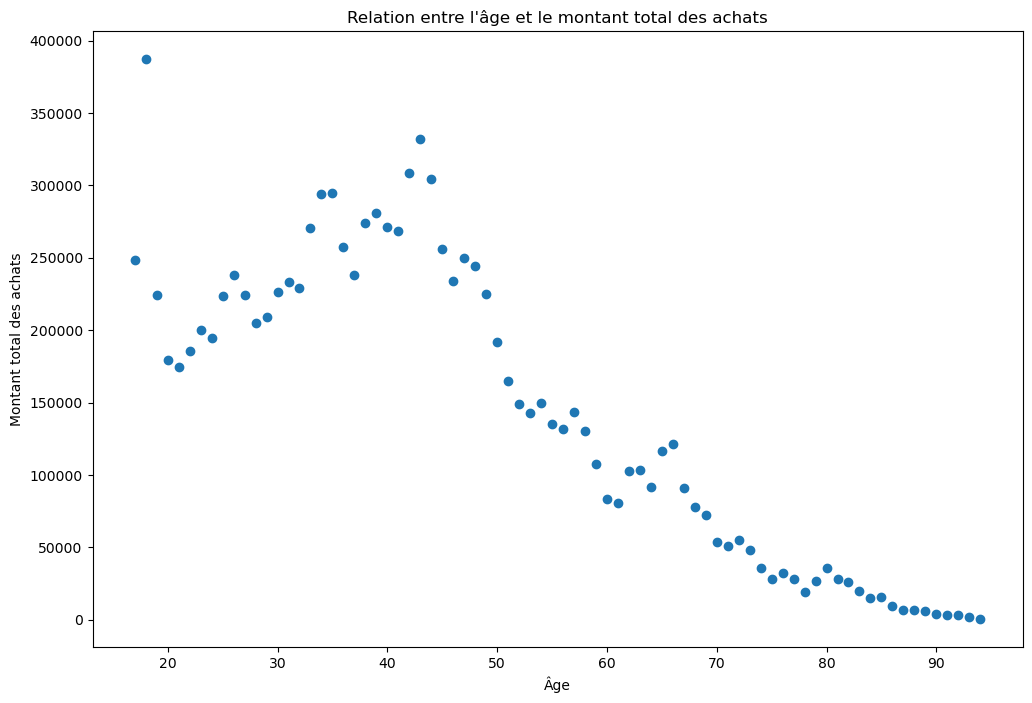

In [9]:
plt.figure(figsize=(12,8))
plt.scatter(client_age.index, montant_total_client.values)
plt.title('Relation entre l\'âge et le montant total des achats')
plt.xlabel('Âge')
plt.ylabel('Montant total des achats')
plt.show()

D'après le test de Pearson, on peut voir que les adultes entre 30-45 ans achètent plus que les personnes agées, les jeunes adultes achètent
et également plus que les personnes agées. C'est à dire que j'ai deux groupes, un positif et un négatif, j'ai deux comportement d'achats différentes, entre 20-45 et 45-90+

<font size="4"><b> 3°) Lien entre l'âge des clients et la fréquence d'achat</b></font>

In [10]:
df_B2C

,session_id,client_id,price,categ,sex,birth,year,month,day,time_buy,age_buy,range_age,Mois/Année
id_prod,,,,,,,,,,,,,
0_1259,s_1,c_329,11.99,0,f,1967,2021,3,1,00:01:07,54,[50 - 55],2021-03-01
1_498,s_4624,c_329,23.37,1,f,1967,2021,3,11,00:57:22,54,[50 - 55],2021-03-01
0_1140,s_7071,c_329,3.73,0,f,1967,2021,3,16,10:01:30,54,[50 - 55],2021-03-01
1_451,s_8134,c_329,20.99,1,f,1967,2021,3,18,17:26:18,54,[50 - 55],2021-03-01
0_1390,s_2,c_664,19.37,0,m,1960,2021,3,1,00:02:26,61,[61 - 66],2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2_209,s_344993,c_3631,69.99,2,f,2004,2023,2,21,21:26:07,19,[17 - 22],2023-02-01
1_366,s_345020,c_4819,28.54,1,f,2004,2023,2,21,21:27:32,19,[17 - 22],2023-02-01
1_369,s_347637,c_3058,23.99,1,m,1959,2023,2,27,08:59:50,64,[61 - 66],2023-02-01


In [11]:
df_B2C["session_id"].value_counts()

session_id
s_118668    14
s_342045    13
s_21005     13
s_96857     13
s_215292    13
            ..
s_147420     1
s_152203     1
s_155731     1
s_143925     1
s_181039     1
Name: count, Length: 322348, dtype: int64

In [12]:
df_B2C["session_id"].count()

640498

In [13]:
len(df_B2C["client_id"].unique())

8596

In [14]:
# Fonction pour calculer la fréquence
# Je vais utliser ma range age pour avoir une valeur qualitative et utiliser l'analyse ANOVA pour faire le lien entre l'age
# et la fréquence d'achat.

def frequence_achat(group):
    session_count = group['session_id'].count()
    client_unique_count = group['client_id'].nunique()
    return session_count / client_unique_count

age_frequence = df_B2C.groupby(['year', 'month', 'range_age']).apply(frequence_achat).reset_index(name='frequence')

display(age_frequence)

,year,month,range_age,frequence
0,2021,3,[17 - 22],2.657194
1,2021,3,[22 - 28],2.573684
2,2021,3,[28 - 33],5.906203
3,2021,3,[33 - 39],6.859649
4,2021,3,[39 - 44],6.446961
...,...,...,...,...
331,2023,2,[66 - 72],3.038690
332,2023,2,[72 - 77],3.167568
333,2023,2,[77 - 83],3.162162
334,2023,2,[83 - 88],2.643836


In [15]:
model = ols('frequence ~ range_age', data = age_frequence).fit()

aov_table = sm.stats.anova_lm(model, typ=2)

In [16]:
aov_table

,sum_sq,df,F,PR(>F)
range_age,608.544598,13.0,283.665334,1.555767e-167
Residual,53.137200,322.0,NaN,NaN


In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              frequence   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     283.7
Date:                Thu, 15 Feb 2024   Prob (F-statistic):          1.56e-167
Time:                        16:24:05   Log-Likelihood:                -166.93
No. Observations:                 336   AIC:                             361.9
Df Residuals:                     322   BIC:                             415.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2.7304      0.083     32.927      0.000       2.567       2.894
range_age[T.[22 - 28]]     0.0144      0.117      0.123      0.902      -0.216       0.245
range_age[T.[28 - 33]]     2.3834      0.117     20.325      0.000       2.153       2.614
range_age[T.[33 - 39]]     3.8889      0.117     33.162      0.000       3.658       4.120
range_age[T.[39 - 44]]     3.7244      0.117     31.759      0.000       3.494       3.955
range_age[T.[44 - 50]]     3.6103      0.117     30.787      0.000       3.380       3.841
range_age[T.[50 - 55]]     0.9899      0.117      8.441      0.000       0.759       1.221
range_age[T.[55 - 61]]     0.7914      0.117      6.748      0.000       0.561       1.022
range_age[T.[61 - 66]]     0.6981      0.117      5.953      0.000       0.467       0.929
range_age[T.[66 - 72]]     0.5894      0.117      5.026      0.000       0.359       0.820
range_age[T.[72 - 77]]     0.6125      0.117      5.223      0.000       0.382       0.843
range_age[T.[77 - 83]]     0.6785      0.117      5.786      0.000       0.448       0.909
range_age[T.[83 - 88]]     0.5047      0.117      4.304      0.000       0.274       0.735
range_age[T.[88 - 94]]     0.7642      0.117      6.516      0.000       0.533       0.995
==============================================================================
Omnibus:                       48.862   Durbin-Watson:                   1.195
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.614
Skew:                           0.586   Prob(JB):                     8.95e-38
Kurtosis:                       6.288   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

En regardant le R-Square qui est de 0.916, j'ai bien une relation entre l'âge et la fréquence d'achat, c'est à dire que j'ai 92% de la variabilité de la fréquence d'achat qui peut être expliqué par l'âge donc l'âge est un prédicteur fort de la frequence d'achat.

<font size="4"><b> 4°) Lien entre l'âge des clients et la taille du panier moyen </b></font>

In [18]:
client_age_et_panier = df_B2C[['age_buy', 'price', 'session_id']]

client_age_et_panier

,age_buy,price,session_id
id_prod,,,
0_1259,54,11.99,s_1
1_498,54,23.37,s_4624
0_1140,54,3.73,s_7071
1_451,54,20.99,s_8134
0_1390,61,19.37,s_2
...,...,...,...
2_209,19,69.99,s_344993
1_366,19,28.54,s_345020
1_369,64,23.99,s_347637


In [19]:
df_client_age_et_panier = client_age_et_panier.groupby(['age_buy'])['session_id'].count()

df_client_age_et_panier

age_buy
17    6281
18    9756
19    5533
20    4547
21    4414
      ... 
90     243
91     222
92     197
93     129
94      23
Name: session_id, Length: 78, dtype: int64

Pareil que tout à l'heure par manque de donnée, je vais utilisé la méthode Spearman, ça me sera utile pour des situations lorsque les variables sont catégorielles comme ici par 'sessions_id'

In [20]:
correlation_coefficient, p_value = spearmanr(df_client_age_et_panier.index, df_client_age_et_panier.values)

print(f"Coefficient de corrélation de Spearman : {correlation_coefficient}")
print(f"P-value : {p_value}")

#Ici la coeff  est proche de -1
#donc lorsque la variable x augmente, la variable Y diminue de manière proportionnelle.

Coefficient de corrélation de Spearman : -0.6968601019233931
P-value : 1.3811203038339299e-12


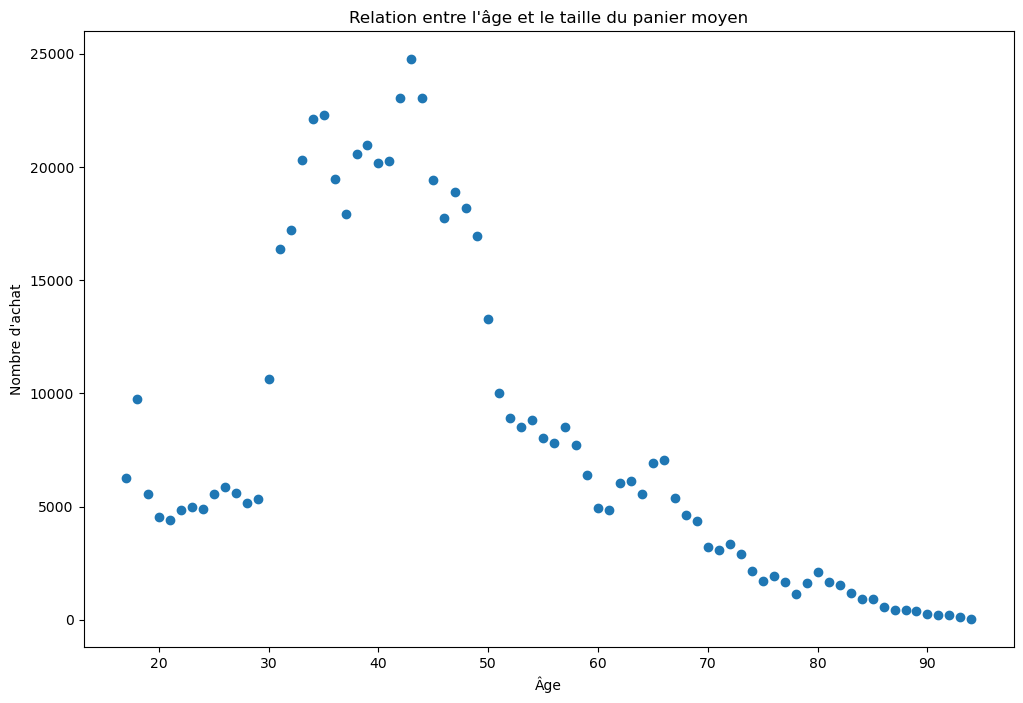

In [21]:
plt.figure(figsize=(12,8))
plt.scatter(df_client_age_et_panier.index, df_client_age_et_panier.values)
plt.title('Relation entre l\'âge et le taille du panier moyen')
plt.xlabel('Âge')
plt.ylabel('Nombre d\'achat')
plt.show()

D'après le graphique, j'ai plusieurs groupes de comportement les 18-29 ans avec les 55-90+ ans qui consomme moins que le groupe des 30-50ans qui effectuent plus d'achats (le nombre de transaction est beaucoup plus elevé)

<font size="4"><b> 5°) Lien entre l'âge des clients et les catégories de livres achetés </b></font>

In [22]:
client_age_et_categ = df_B2C[['range_age', 'categ']]

client_age_et_categ

,range_age,categ
id_prod,,
0_1259,[50 - 55],0
1_498,[50 - 55],1
0_1140,[50 - 55],0
1_451,[50 - 55],1
0_1390,[61 - 66],0
...,...,...
2_209,[17 - 22],2
1_366,[17 - 22],1
1_369,[61 - 66],1


In [23]:
client_age_et_categ = pd.crosstab(client_age_et_categ
['range_age'], client_age_et_categ
['categ'])

client_age_et_categ

categ,0,1,2
range_age,,,
[17 - 22],7857,13836,13671
[22 - 28],5855,10415,10600
[28 - 33],49125,20006,5857
[33 - 39],77236,24732,355
[39 - 44],99362,32364,508
[44 - 50],68632,22222,318
[50 - 55],27996,29092,465
[55 - 61],14921,20147,299
[61 - 66],15800,20391,352


In [24]:
chi2, p, dof, expected = chi2_contingency(client_age_et_categ)

print(f"Statistique du test du khi-deux : {chi2}")
print(f"Valeur p : {p}")

inf = (client_age_et_categ - expected)**2 / expected

Statistique du test du khi-deux : 228509.3590709221
Valeur p : 0.0


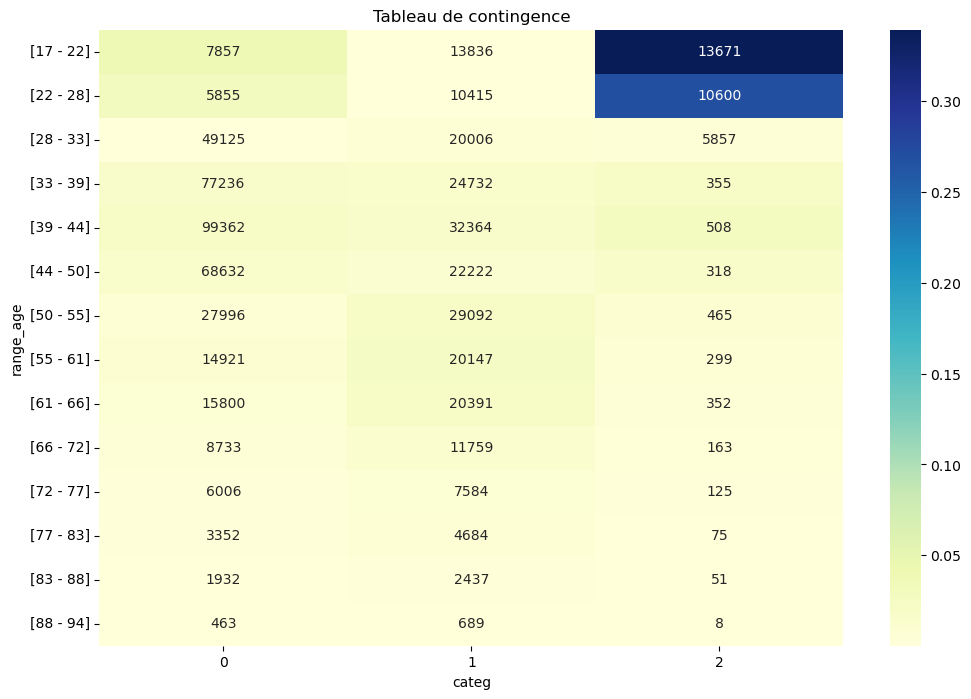

In [25]:
plt.figure(figsize=(12, 8))

sns.heatmap(inf / chi2 , annot=client_age_et_categ, fmt="d", cmap="YlGnBu")
plt.title('Tableau de contingence')

plt.show()

D'après la heatmap, Il y a une corrélation plus élevé pour la catégorie 2 pour les 17-28ans. Peut être faussé car ce sont possiblement des adultes qui achètent pour leurs enfants ?? 

Mais une p-value très proche de zéro suggère généralement un rejet de l'hypothèse nulle, la taille de l'échantillon, et d'autres considérations doivent également être prises en compte lors de l'interprétation des résultats.